# Problem Statement
Flight ticket prices can be hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story.
We might have often heard travellers saying that flight ticket prices are so unpredictable.
I worked on this ML problem statement and came up with a model which predicts the price of Flight tickets based on some independent Features.
A user can predict the price of the Flight Fare based on input features.
Prediction results can be useful for traveller to get suggested price. 


# The Dataset
This dataset comprises of Flight ticket Prices taken from Kaggle website,We have 2 datasets here — training set and test set.

The training set contains the features, along with the prices of the flights. It contains 10683 records, 10 input features and 1 output column — ‘Price’. The test set contains 2671 records and 10 input features. The output ‘Price’ column needs to be predicted in this set. We will use Regression techniques here, since the predicted output will be a continuous value.

# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading the dataset

In [2]:
df=pd.read_excel('C:\\Users\\Pranavashree\\Downloads\\Data_Train (2).xlsx')

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
#summary of the dataset
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [6]:
#Checking the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

# EDA and Feature Engineering

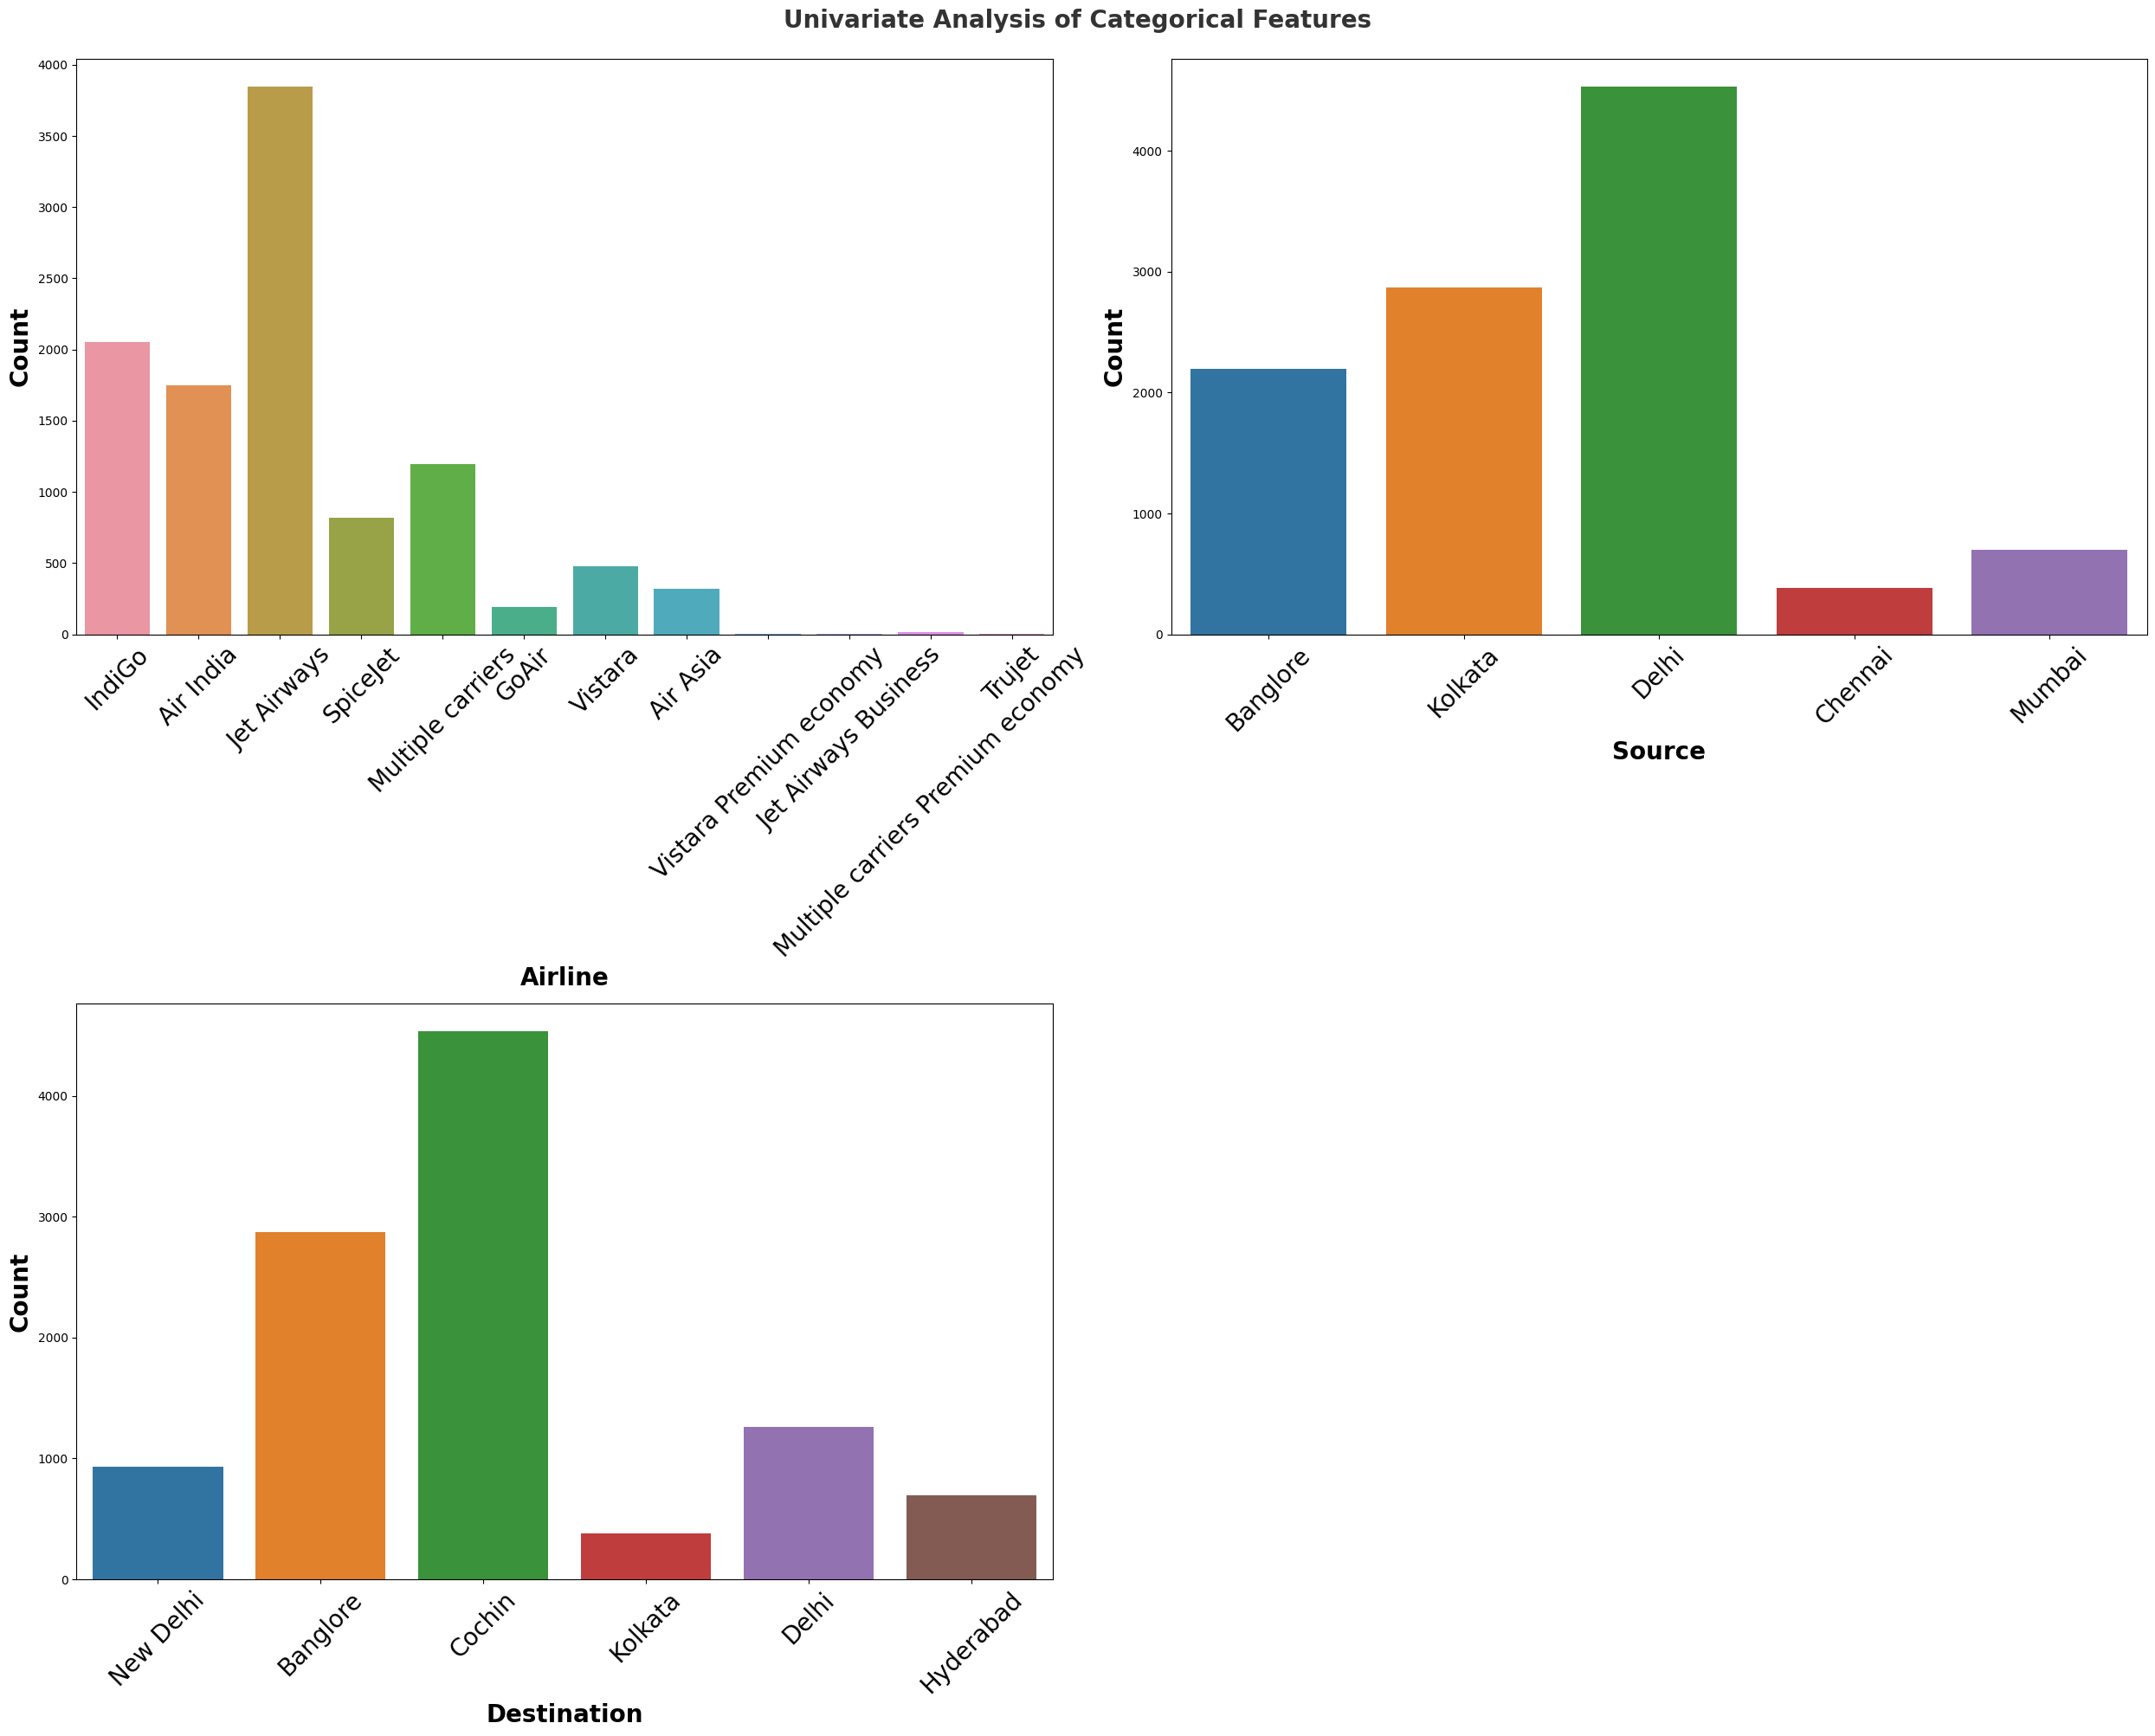

In [10]:
##Categorical Features
plt.figure(figsize=(25,20))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Airline','Source', 'Destination']
for i in range(0, len(category)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[category[i]])
    plt.ylabel("Count", weight="bold", fontsize=20)
    plt.xlabel(category[i], weight="bold", fontsize=20)
    plt.xticks(rotation=45,fontsize=20)
    plt.tight_layout()

In [11]:
df['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

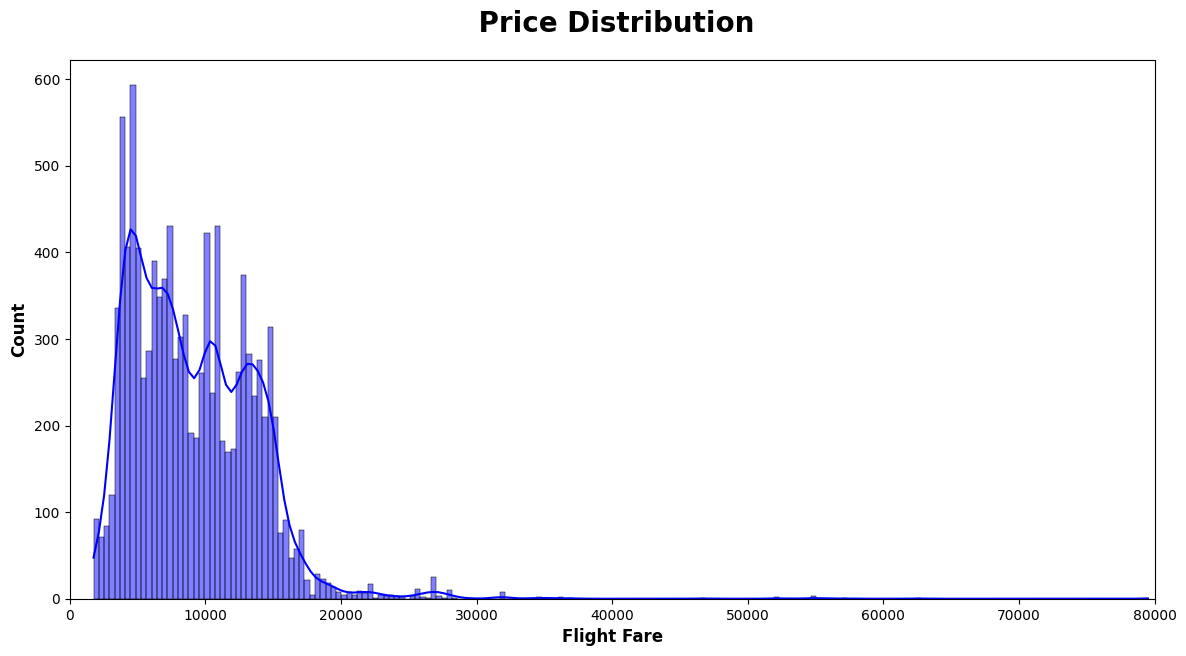

In [12]:
plt.subplots(figsize=(14,7))
sns.histplot(df.Price, bins=200, kde=True, color = 'b')
plt.title(" Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

In [13]:
#Top 10 Aviation Companies whose flight tickets are sold the most
df.Airline.value_counts()[0:10]

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: Airline, dtype: int64

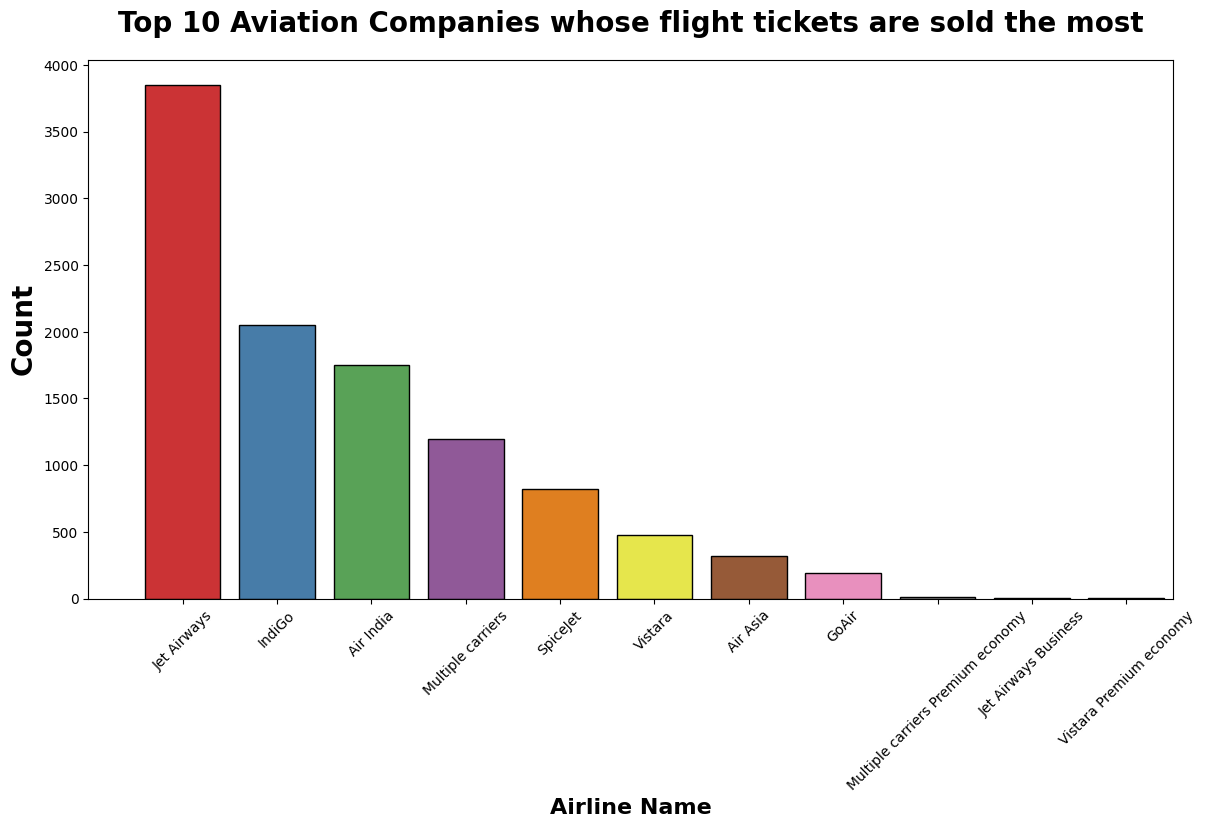

In [14]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order = df['Airline'].value_counts().index)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [15]:
#Check mean price of Jet Airways whose flight tickets are sold the most
jet_airways = df[df['Airline'] == 'Jet Airways']['Price'].mean()
print(f'The mean price of Jet Airways Flight Tickets  is {jet_airways:.2f} Rupees')

The mean price of Jet Airways Flight Tickets  is 11643.92 Rupees


In [16]:
#Costliest Aviation Companies and Costliest Flight Tickets
aviation_company_airline = df.groupby('Airline').Price.max()
aviation_company= aviation_company_airline.to_frame().sort_values('Price',ascending=False)[0:10]
aviation_company

,Price
Airline,
Jet Airways Business,79512
Jet Airways,54826
Multiple carriers,36983
Air India,31945
SpiceJet,23267
GoAir,22794
IndiGo,22153
Vistara,21730
Multiple carriers Premium economy,14629


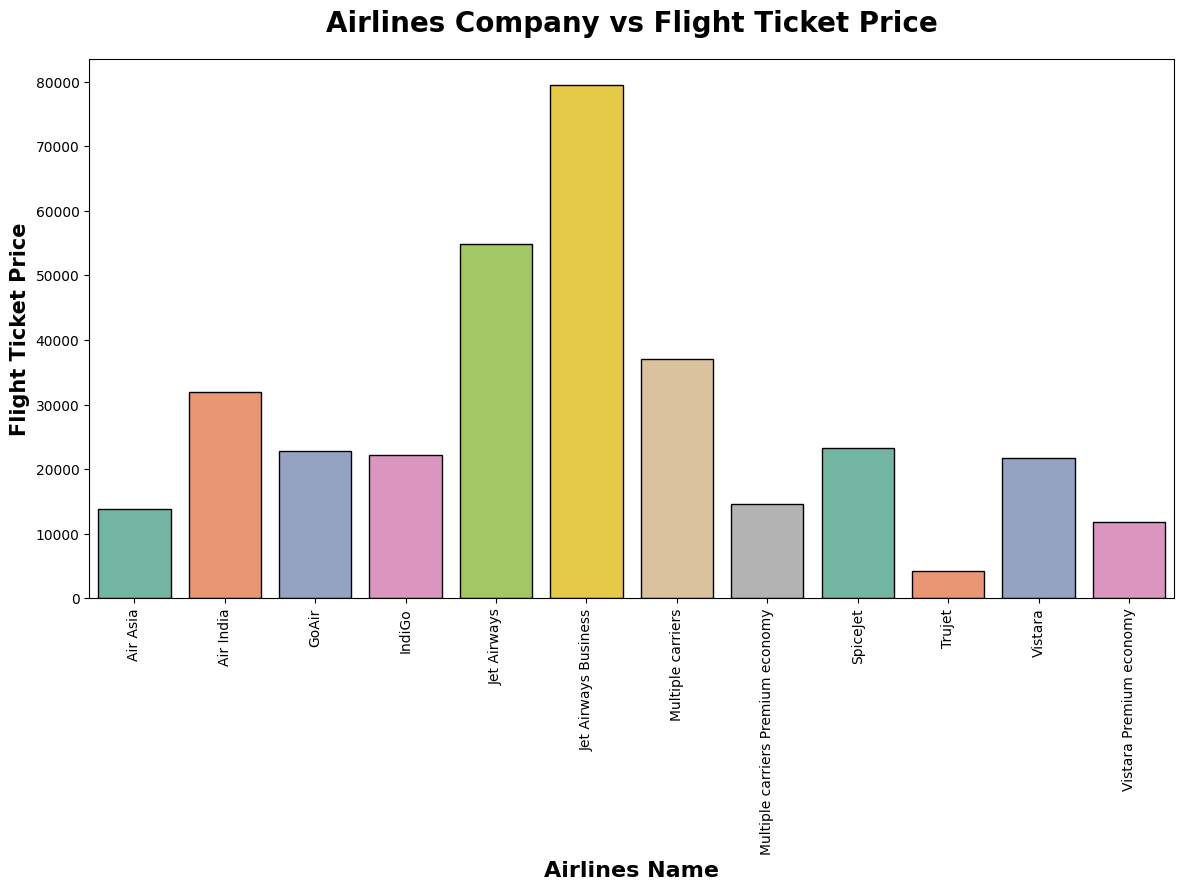

In [17]:
plt.subplots(figsize=(14,7))
sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airlines Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

# Extracting Date & Month from Date of Journey Column


In [18]:
#Date
df["journey_Date"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.day

In [19]:
#month
df["journey_Month"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.month

In [20]:
#dropping
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [22]:
#Extracting hour
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour  

In [23]:
#Extracting minutes
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [24]:
#dropping the dep_time
df.drop(['Dep_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [25]:
#Extracting hour
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour  

In [26]:
#Extracting minutes
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [27]:
#Now we will drop the dep_time, no use
df.drop(['Arrival_Time'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [28]:
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))#Extracting mins from duration

In [29]:
df["Duration_hours"] = duration_hours 
df["Duration_mins"] = duration_mins 


In [30]:
#dropping the Durtaion column
df.drop(['Duration'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


# Handling Categorical Data:

Nominal data → are not in any order → OneHotEncoder is used in this case

Ordinal data → are in order → LabelEncoder is used in this case

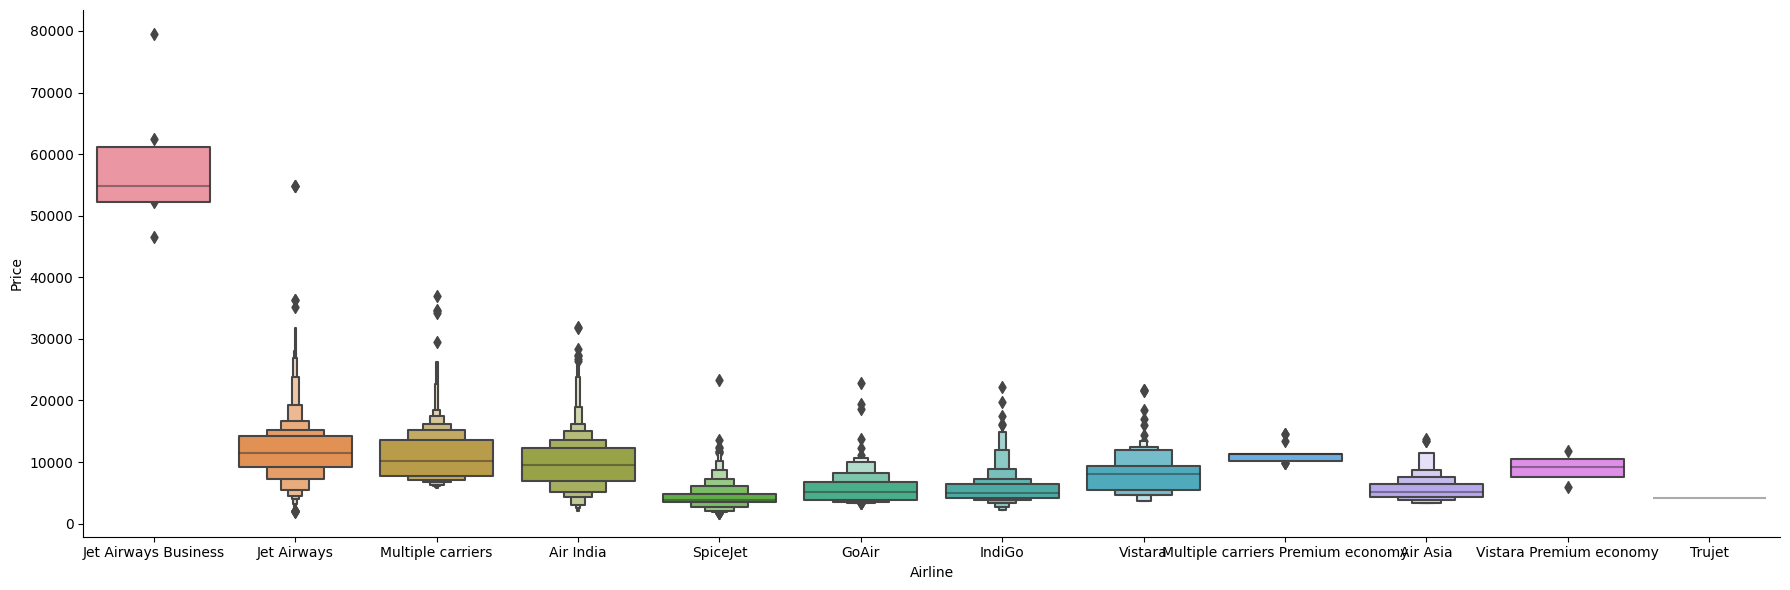

In [31]:
#Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [32]:
#OneHotEncoding -----> Nominal data
Airline = df[["Airline"]]
Airline = pd.get_dummies(df['Airline'],drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0


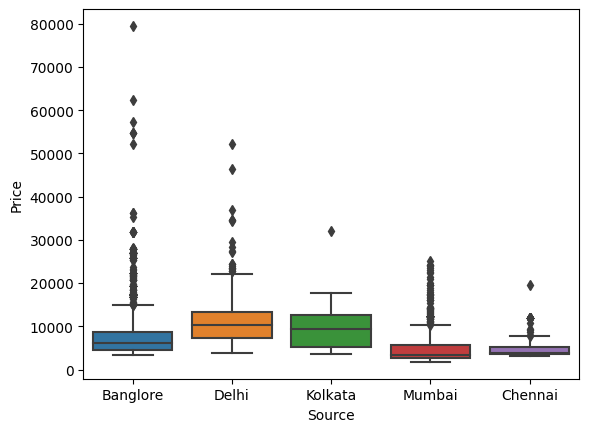

In [33]:
#Source vs Price
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False))
plt.show()

In [34]:
#One hot Ending
Source = df[["Source"]]
Source = pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [35]:
## As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
#Dropping Additional Info and Route
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [37]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [38]:
#Ordinal Categorical type we perform LabelEncoder
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


<AxesSubplot: >

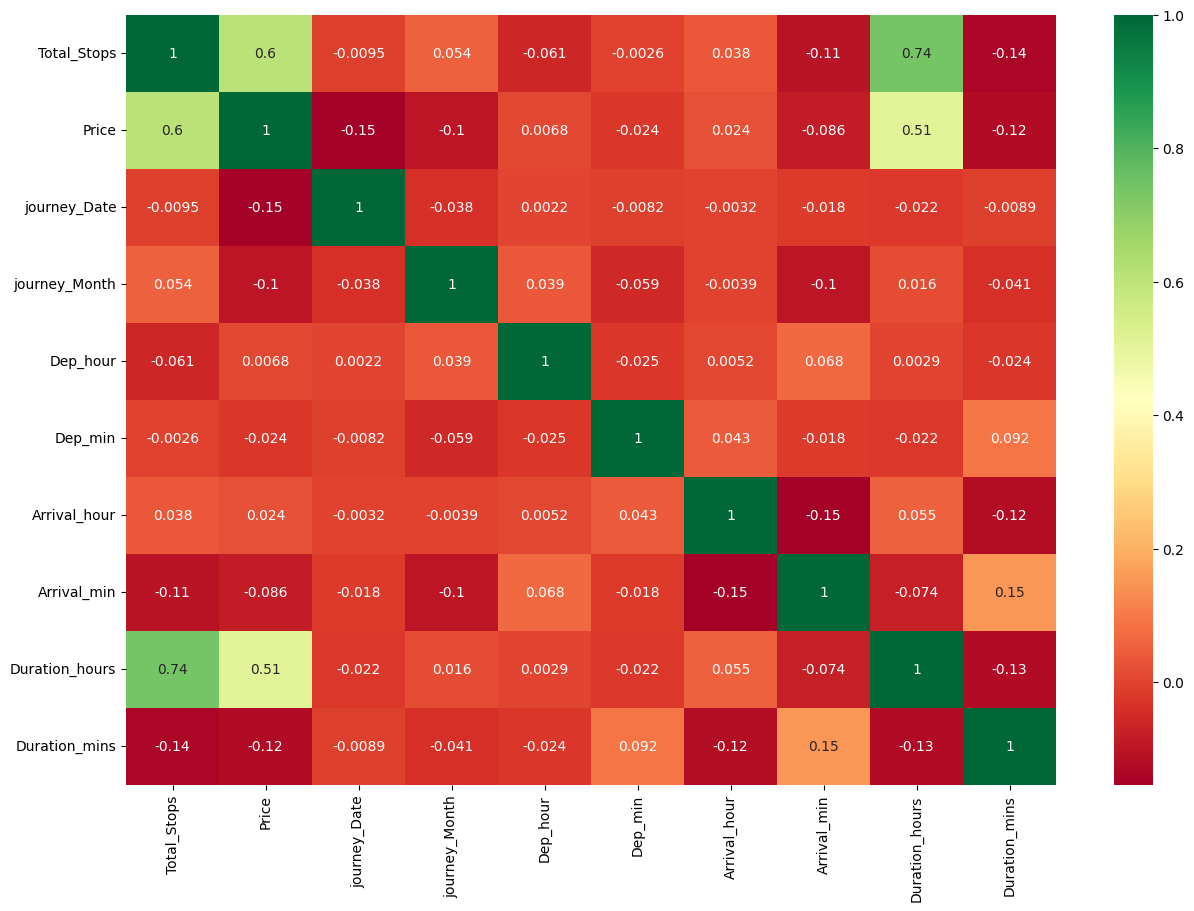

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True, cmap = "RdYlGn")

In [40]:
#Final Dataset
data_train=pd.concat([df,Airline , Source, Destination],axis=1)
# we have drop the varibles
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [41]:
#Concatenate dataframe --> df+ Airline + Source + Destination
data_train=pd.concat([df,Airline , Source, Destination],axis=1)
# we have drop the varibles
data_train.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_train.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,...,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,...,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [42]:
data_train.shape


(10682, 31)

# Test Data

In [43]:
test_data = pd.read_excel(r'C:\\Users\\Pranavashree\\Downloads\\Test_set.xlsx')
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [44]:
print(test_data.info())

test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info

test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Applying Label Encoder
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64
Airline
--------------------------------------------------------------------------

# Building Machine Learning Model

In [45]:
data_train.columns

Index(['Total_Stops', 'Price', 'journey_Date', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air Asia', 'Air India', 'GoAir', 'IndiGo',
       'Jet Airways', 'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [46]:
x= data_train[['Total_Stops', 'journey_Date', 'journey_Month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
x.head()

,Total_Stops,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
y=data_train['Price']

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=32)

In [50]:
print("The size of training input is", x_train.shape)
print("The size of training output is", y_train.shape)
print("The size of testing input is", x_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8011, 29)
The size of training output is (8011,)
The size of testing input is (2671, 29)
The size of testing output is (2671,)


In [51]:
def predict(algorithm):
    print("Algorithm:",algorithm)
    model=algorithm.fit(x_train,y_train)
    print("Training score: {}".format(model.score(x_train,y_train)))
    y_pred=model.predict(x_test)
    print("The Predicted Price values are:",y_pred)
    print('\n')
    r2=r2_score(y_test,y_pred)
    print("r2 score :",r2)
    #updating score in df  
    #score=score.append({'Model':algorithm,'Accuracy':r2})
    print('MAE:',(mean_absolute_error(y_test,y_pred)))
    print('MSE:',(mean_squared_error(y_test,y_pred)))
    return(r2)

In [52]:
lr=predict(LinearRegression())  

Algorithm: LinearRegression()
Training score: 0.6224807089361634
The Predicted Price values are: [13320.90183195 11624.80691659  3055.06180625 ...  2984.77371755
 12972.13377512  6708.24518372]


r2 score : 0.6246491102288825
MAE: 1939.326524699602
MSE: 7051673.8666093


In [53]:
knn=predict(KNeighborsRegressor())

Algorithm: KNeighborsRegressor()
Training score: 0.7303393400451352
The Predicted Price values are: [11620.  12541.2  3081.6 ...  4478.2 13486.8  6469.8]


r2 score : 0.5626795055775139
MAE: 1842.9958816922501
MSE: 8215889.680539125


In [54]:
dt=predict(DecisionTreeRegressor())

Algorithm: DecisionTreeRegressor()
Training score: 0.9725561062115716
The Predicted Price values are: [11507. 10577.  4392. ...  4804. 11118.  8016.]


r2 score : 0.6426656288710361
MAE: 1380.602034194434
MSE: 6713199.609218769


In [55]:
rf=predict(RandomForestRegressor())

Algorithm: RandomForestRegressor()
Training score: 0.9547479604743483
The Predicted Price values are: [13494.2045     11568.6565      3311.91       ...  4909.19
 11182.09593651  7899.84      ]


r2 score : 0.8169286549809179
MAE: 1189.3132882556938
MSE: 3439340.240230362


In [56]:
# storing the accuracies of these 3 models in a dataframe
score_df=pd.DataFrame({'Model': ['Linear Regression','K-Nearest Neighbour',
                                 'Decision Tree','Random Forest'], 
                       'Accuracy': [lr*100, knn*100,dt*100, rf*100]})
score_df

,Model,Accuracy
0,Linear Regression,62.464911
1,K-Nearest Neighbour,56.267951
2,Decision Tree,64.266563
3,Random Forest,81.692865


In [57]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x, y)

ExtraTreesRegressor()

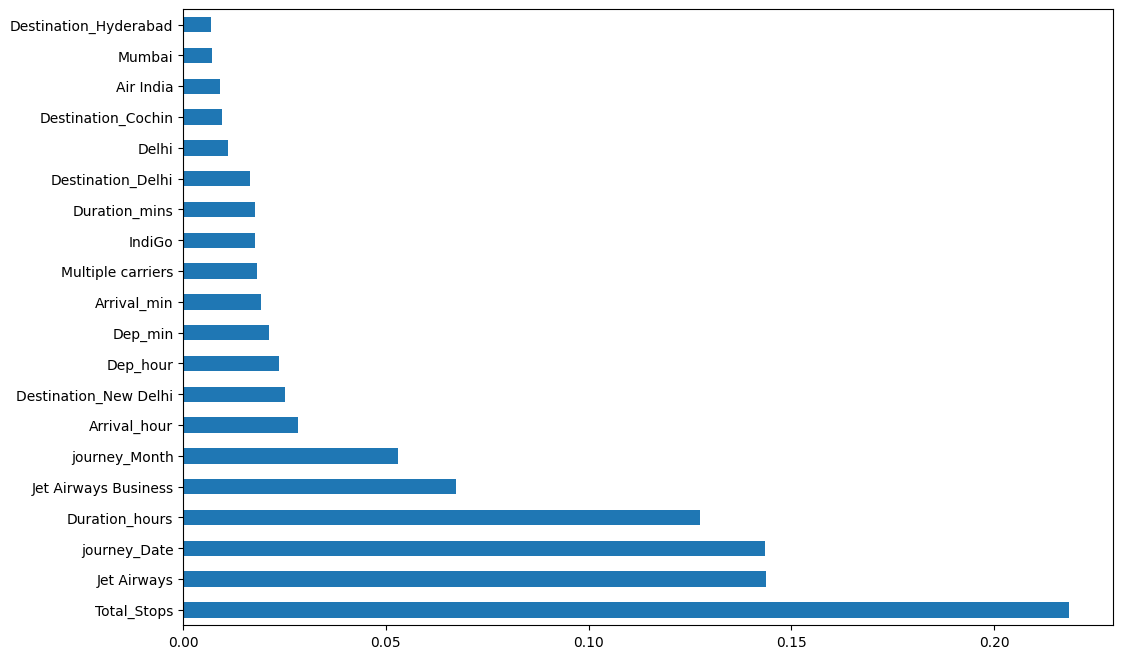

In [58]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=x.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Hyperparameter tuning

In [59]:
#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
random_search = {'n_estimators' : [100, 120, 150, 180, 200,220,250],
                 'max_features':['auto','sqrt'],
                 'max_depth':[5,10,15,20],
                 'min_samples_split' : [2, 5, 10, 15, 100],
                 'min_samples_leaf' : [1, 2, 5, 10]}
rf_regressor=RandomForestRegressor()
rf_model=RandomizedSearchCV(estimator=rf_regressor,param_distributions=random_search,
                            cv=3,n_jobs=-1,verbose=2,random_state=0)
rf_model.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 120, 150, 180,
                                                         200, 220, 250]},
                   random_state=0, verbose=2)

In [60]:
# best parameter
rf_model.best_params_

{'n_estimators': 220,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [61]:
#predicting the values
pred=rf_model.predict(x_test)
r2_score(y_test,pred)

0.843651029349066

In [62]:
#After hypertuning, the accuracy increases.
print('r2_score:',r2_score(y_test,pred))
print('MAE:', mean_absolute_error(y_test, pred))
print('MSE:', mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, pred)))

r2_score: 0.843651029349066
MAE: 1136.5227976770948
MSE: 2937310.0756008714
RMSE: 1713.8582425629231


In [63]:
y_pred=rf_model.predict(x_test)

<AxesSubplot: xlabel='Price', ylabel='Density'>

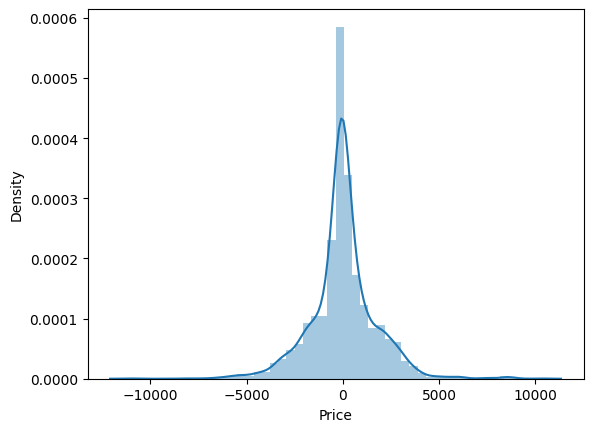

In [64]:
sns.distplot(y_test-y_pred,kde=True)

Text(0, 0.5, 'prediction')

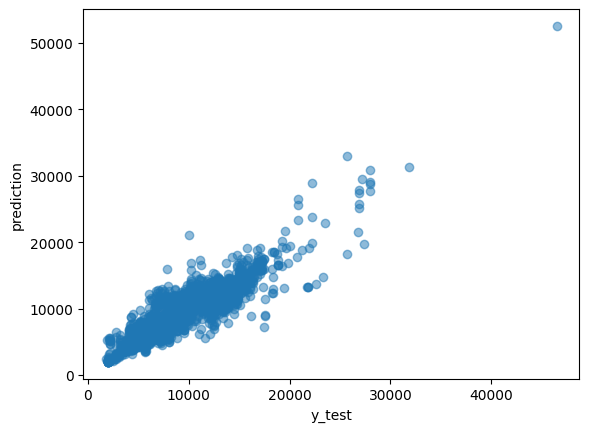

In [65]:
plt.scatter(y_test,y_pred,alpha=0.5)
plt.xlabel('y_test')
plt.ylabel('prediction')

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1136.5227976770948
MSE: 2937310.0756008714
RMSE: 1713.8582425629231


In [67]:
predicted_values=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})

In [68]:
predicted_values

,Actual,Predicted
8396,13775,13575.582120
9284,10262,11285.642776
10609,2754,3222.408940
10229,5964,5548.119977
3874,12327,9540.842013
...,...,...
5803,4944,5769.602350
5663,8479,8389.036566
8332,4804,4907.300879
10453,13014,11039.146261


In [69]:
y_pred

array([13575.58211991, 11285.64277568,  3222.40894015, ...,
        4907.30087932, 11039.14626133,  7739.21796829])

# Conclusion:

We have used here Linear Regreesion, KNeighborsRegressor, DecisionTreeRegressor,and RandomForestRegressor algorithm for prediction, we come to know that Random Forest classifier is more accurate among other algorithm,have used a random forest model for this data with improved accuracy by doing hyperparameter tuning.
As a result, we were able to successfully train our regression model, the ‘Random forest model,’ to forecast fares of flight tickets with an R2 score of 84 percent and complete the required work.